In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def implied_correlation(sigma_i, sigma_1, beta, w1):
    """Calculates the implied correlation."""
    sigma_2 = beta * sigma_1
    numerator = sigma_i**2 - w1 * sigma_1**2 - (1 - w1) * sigma_2**2
    denominator = 2 * w1 * (1 - w1) * beta * sigma_1**2
    return numerator / denominator

0.15000000000000002


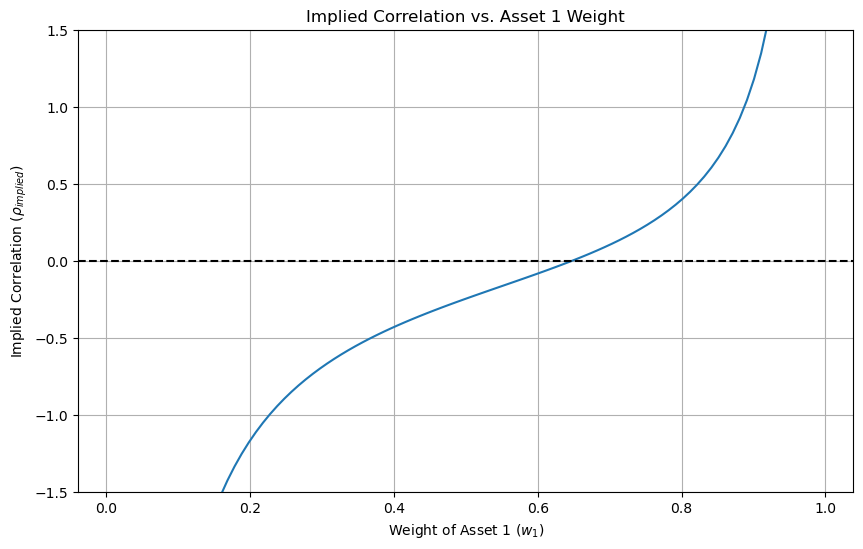

In [26]:
# Define parameters
sigma_i = 0.12
sigma_1 = 0.10
beta = 1.5
print(beta*sigma_1)

# Generate weights
w1_values = np.linspace(0.01, 0.99, 100) #avoiding 0 and 1, to prevent division by zero.

# Calculate implied correlations
rho_values = [implied_correlation(sigma_i, sigma_1, beta, w) for w in w1_values]

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(w1_values, rho_values)
plt.xlabel("Weight of Asset 1 ($w_1$)")
plt.ylabel("Implied Correlation ($ρ_{implied}$)")
plt.ylim((-1.5,1.5))
plt.title("Implied Correlation vs. Asset 1 Weight")
plt.grid(True)

plt.axhline(y=0, color='black', linestyle='--') 

plt.show()

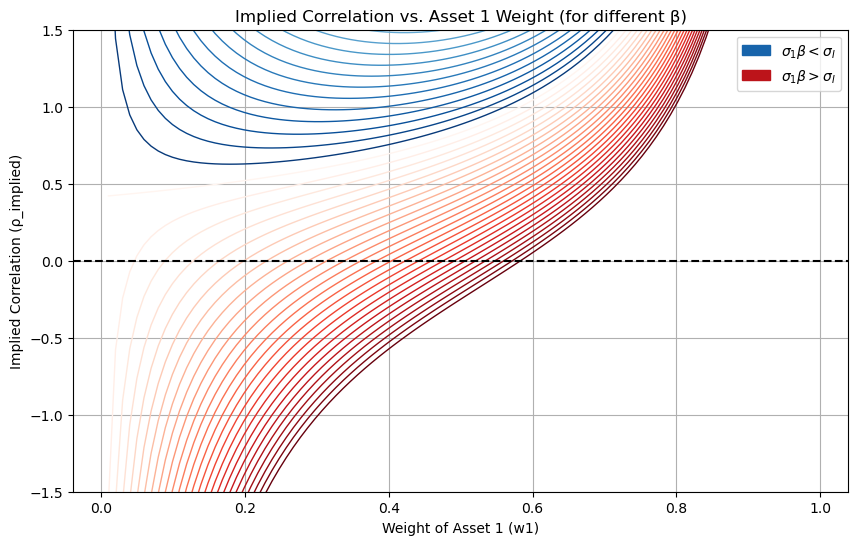

In [40]:
# Define parameters
sigma_i = 0.15  # Portfolio volatility
sigma_1 = 0.10  # Volatility of asset 1

# Generate weights
w1_values = np.linspace(0.01, 0.99, 100)

# Beta values to plot
beta_values = np.linspace(1, 2, 51)  # Increased resolution for finer colors

# Plot the curves
plt.figure(figsize=(10, 6))

# Create colormaps
cmap_lower = plt.get_cmap('Blues')  # For sigma_1 * beta < sigma_i
cmap_upper = plt.get_cmap('Reds')  # For sigma_1 * beta > sigma_i

for beta in beta_values:
    rho_values = [implied_correlation(sigma_i, sigma_1, beta, w) for w in w1_values]
    
    if sigma_1 * beta < sigma_i:
        normalized_beta = (beta - min(beta_values)) / (sigma_i / sigma_1 - min(beta_values))
        color = cmap_lower(normalized_beta)
    else:
        normalized_beta = (beta - sigma_i / sigma_1) / (max(beta_values) - sigma_i / sigma_1)
        color = cmap_upper(normalized_beta)
    
    plt.plot(w1_values, rho_values, color=color, linewidth=1)

plt.xlabel("Weight of Asset 1 (w1)")
plt.ylabel("Implied Correlation (ρ_implied)")
plt.title("Implied Correlation vs. Asset 1 Weight (for different β)")
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim((-1.5, 1.5))

# Create a custom legend (optional)
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color=cmap_lower(0.8), label=r'$\sigma_1 \beta < \sigma_I$')
red_patch = mpatches.Patch(color=cmap_upper(0.8), label=r'$\sigma_1 \beta > \sigma_I$')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')

plt.show()

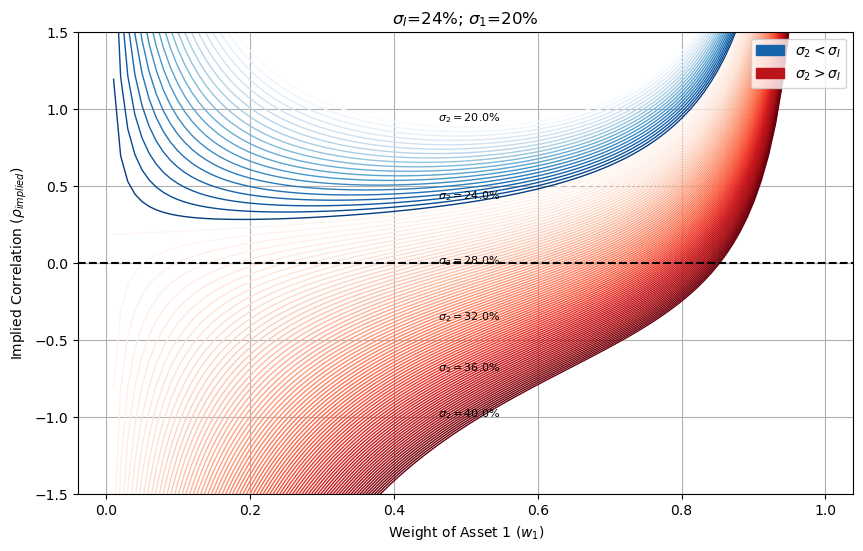

In [53]:
# Define parameters
sigma_i = 0.24  # Portfolio volatility
sigma_1 = 0.20  # Volatility of asset 1

# Generate weights
w1_values = np.linspace(0.01, 0.99, 100)

# Beta values to plot
beta_values = np.linspace(1, 2, 101)  # Increased resolution for finer colors

# Plot the curves
plt.figure(figsize=(10, 6))

# Create colormaps
cmap_lower = plt.get_cmap('Blues')  # For sigma_1 * beta < sigma_i
cmap_upper = plt.get_cmap('Reds')  # For sigma_1 * beta > sigma_i

for i, beta in enumerate(beta_values):
    rho_values = [implied_correlation(sigma_i, sigma_1, beta, w) for w in w1_values]
    
    if sigma_1 * beta < sigma_i:
        normalized_beta = (beta - min(beta_values)) / (sigma_i / sigma_1 - min(beta_values))
        color = cmap_lower(normalized_beta)
    else:
        normalized_beta = (beta - sigma_i / sigma_1) / (max(beta_values) - sigma_i / sigma_1)
        color = cmap_upper(normalized_beta)
    
    plt.plot(w1_values, rho_values, color=color, linewidth=1)
    
    # Add beta labels every 20 betas
    if i % 20 == 0:
        # Find the middle w1 value for label placement
        middle_w1_index = len(w1_values) // 2
        middle_rho = rho_values[middle_w1_index]
        plt.annotate(f"$\sigma_2 = ${beta*sigma_1*100:.1f}%", (w1_values[middle_w1_index], middle_rho),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.xlabel("Weight of Asset 1 ($w_1$)")
plt.ylabel(r"Implied Correlation ($\rho_{implied}$)")
plt.title(f"$\sigma_I$={sigma_i*100:.0f}%; $\sigma_1$={sigma_1*100:.0f}%")
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim((-1.5, 1.5))

# Create a custom legend (optional)
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color=cmap_lower(0.8), label=r'$\sigma_2 < \sigma_I$')
red_patch = mpatches.Patch(color=cmap_upper(0.8), label=r'$\sigma_2 > \sigma_I$')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')

plt.show()

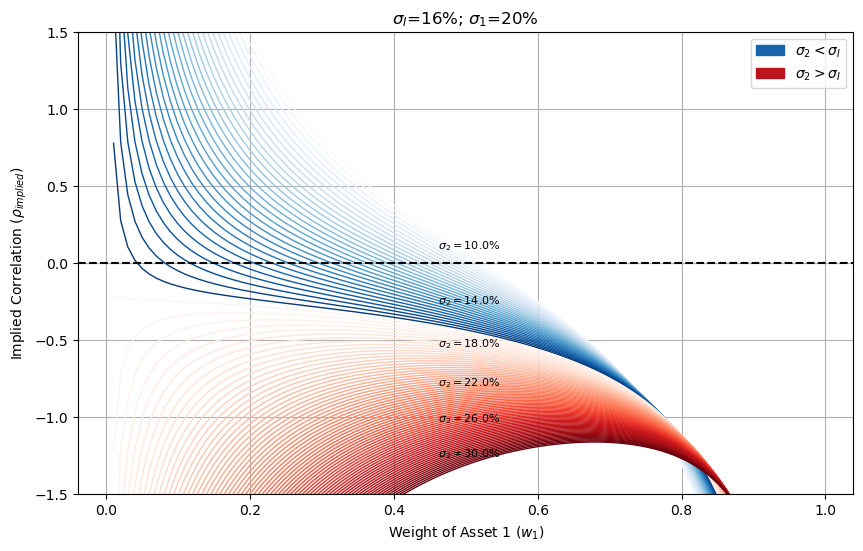

In [55]:
# Define parameters
sigma_i = 0.16  # Portfolio volatility
sigma_1 = 0.20  # Volatility of asset 1

# Generate weights
w1_values = np.linspace(0.01, 0.99, 100)

# Beta values to plot
beta_values = np.linspace(0.5, 1.5, 101)  # Increased resolution for finer colors

# Plot the curves
plt.figure(figsize=(10, 6))

# Create colormaps
cmap_lower = plt.get_cmap('Blues')  # For sigma_1 * beta < sigma_i
cmap_upper = plt.get_cmap('Reds')  # For sigma_1 * beta > sigma_i

for i, beta in enumerate(beta_values):
    rho_values = [implied_correlation(sigma_i, sigma_1, beta, w) for w in w1_values]
    
    if sigma_1 * beta < sigma_i:
        normalized_beta = (beta - min(beta_values)) / (sigma_i / sigma_1 - min(beta_values))
        color = cmap_lower(normalized_beta)
    else:
        normalized_beta = (beta - sigma_i / sigma_1) / (max(beta_values) - sigma_i / sigma_1)
        color = cmap_upper(normalized_beta)
    
    plt.plot(w1_values, rho_values, color=color, linewidth=1)
    
    # Add beta labels every 20 betas
    if i % 20 == 0:
        # Find the middle w1 value for label placement
        middle_w1_index = len(w1_values) // 2
        middle_rho = rho_values[middle_w1_index]
        plt.annotate(f"$\sigma_2 = ${beta*sigma_1*100:.1f}%", (w1_values[middle_w1_index], middle_rho),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.xlabel("Weight of Asset 1 ($w_1$)")
plt.ylabel(r"Implied Correlation ($\rho_{implied}$)")
plt.title(f"$\sigma_I$={sigma_i*100:.0f}%; $\sigma_1$={sigma_1*100:.0f}%")
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim((-1.5, 1.5))

# Create a custom legend (optional)
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color=cmap_lower(0.8), label=r'$\sigma_2 < \sigma_I$')
red_patch = mpatches.Patch(color=cmap_upper(0.8), label=r'$\sigma_2 > \sigma_I$')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')

plt.show()